## Week 2 Exercise

**Assignment**: This exercise will use a live, publicly accessable API to collect multiple categories of data in order to conduct analyses and create visulizations.  Spefically, you will:
  
* Collect data from a public website
* Read data into dataframes
* Develop a research question(s)
* Inform that research question with visualizations
* Inform that research question with basic statistics
* Provide a short write up of your analysis
* Generalize this analysis to "big data"

For this exercise, you will have to complete all the tasks within this notebook, save the entire notebook, and then upload into the Week 2 Assignment for your group on BlackBoard. Save this notebook with a new name with the following format:

**Week_2_Exercise_Group_group_number.ipynb**

These in-class exercises are designed to allow you to explore Python with your group and **DO NOT** include step-by-step directions or answers that have only one possibility. Use your team and other resources to determine how best to complete them. Make sure before you turn in your notebook that it runs without errors and the requested output is visible in the notebook. If you go through multiple steps in your code, make sure all those steps are included so that we can evaluate your work.

## Basketball Statistics

For this exercise, we are going to use the National Basketball Association's statitics site. We will be using a Python library called [requests](http://docs.python-requests.org/en/latest/) to send a URL to their http://stats.nba.com site to query it for player shot data. Requests makes it easy to do "web scaping" like this. The data returned from the website is JSON, but we will reading that JSON into a pandas dataframe for analysis.

In order to make the retreival of the data easier, we have written a function that will return the shot statistics for any player for the 2014-2015 season. You have already been using simple functions like <code>type</code> and <code>id</code>, but in this case we are writing our own. Once you run the code in the cell below, the function <code>get_shot_stats</code> will be available for you to use just as any other Python function. Our function has one input parameter which is the NBA's player id.

Run the code in the following block to make the function available for use in the notebook namespace.

In [2]:
import requests
import pandas as pd

def get_shot_stats(player_id):
    """
    Return a dataframe of player shot statistics from the NBA API.
    
    Keyword arguments:
    player_id: the integer player id from http://stats.nba.com
    """

    shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?CFID=33&CFPAR'\
                    'AMS=2014-15&ContextFilter=&ContextMeasure=FGA&DateFrom=&D'\
                    'ateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Loca'\
                    'tion=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&'\
                    'PaceAdjust=N&PerMode=PerGame&Period=0&PlayerID={}&Plu'\
                    'sMinus=N&Position=&Rank=N&RookieYear=&Season=2014-15&Seas'\
                    'onSegment=&SeasonType=Regular+Season&TeamID=0&VsConferenc'\
                    'e=&VsDivision=&mode=Advanced&showDetails=0&showShots=1&sh'\
                    'owZones=0'.format(player_id)
                    
    response = requests.get(shot_chart_url)
    headers = response.json()['resultSets'][0]['headers']
    shots = response.json()['resultSets'][0]['rowSet']
    shot_df = pd.DataFrame(shots, columns=headers)
    
    return shot_df

Now, let's use the function to collect data for Phoenix Sun's player Brandon Knight. We happen to know Brandon Knight's id number is 202688.

In [3]:
# Assign Brandon's id to a variable.
brandon = 202688

In [4]:
# Use our fucntion to get Brandon's stats and assign the returned dataframe to var.
brandon_shots = get_shot_stats(brandon)

In [5]:
# Print the dataframe to make sure it worked.
print brandon_shots

             GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID     PLAYER_NAME  \
0    Shot Chart Detail  0021400004             10     202688  Brandon Knight   
1    Shot Chart Detail  0021400004             18     202688  Brandon Knight   
2    Shot Chart Detail  0021400004             21     202688  Brandon Knight   
3    Shot Chart Detail  0021400004             28     202688  Brandon Knight   
4    Shot Chart Detail  0021400004             50     202688  Brandon Knight   
5    Shot Chart Detail  0021400004            100     202688  Brandon Knight   
6    Shot Chart Detail  0021400004            244     202688  Brandon Knight   
7    Shot Chart Detail  0021400004            252     202688  Brandon Knight   
8    Shot Chart Detail  0021400004            321     202688  Brandon Knight   
9    Shot Chart Detail  0021400004            325     202688  Brandon Knight   
10   Shot Chart Detail  0021400004            328     202688  Brandon Knight   
11   Shot Chart Detail  0021400004      

With larger dataframe like this, returning the columns attribute via <code>df.columns</code> is a convienent way to see the column names without printing the entire dataframe. 

Using your knowledge of data selection, indexing, boolean masks, and the dataframe function <code>.sum()</code>, print out the number of baskets Brandon made both playing for the Suns and the Bucks.

In [6]:
# Print the number of baskets Brandon made as a Sun.
shots_made_Suns = brandon_shots[(brandon_shots.TEAM_NAME == 'Phoenix Suns') & (brandon_shots.SHOT_MADE_FLAG == 1)]
shots_made_Suns['SHOT_MADE_FLAG'].sum()


51

In [7]:
# Print the number of baskets Brandon made as a Buck.
shots_made_Bucks = brandon_shots[(brandon_shots.TEAM_NAME == 'Milwaukee Bucks') & (brandon_shots.SHOT_MADE_FLAG == 1)]
shots_made_Bucks['SHOT_MADE_FLAG'].sum()

324

The pandas selection and statistics functions offer a powerful tool to explore datasets like the one we collected from the NBA. Let's give you one more tool before we continue- visualization.

In the next code block we are going to import a function that allows us to visualize Brandon's shots on a basketball court. Specifically, this function draws the court. When you are working with matplotlib plots in Python, you can think of each individual function as drawing a layer and the <code>draw_court</code> function will provide the court layer that you will plot on top of. Run the following code block to see that.

In [8]:
# Let's read in a helper function for drawing and set up plotting

import matplotlib.pyplot as plt
from draw_court import draw_court
# Thanks to Savvas Tjortjoglou for letting us use his code in our course!
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


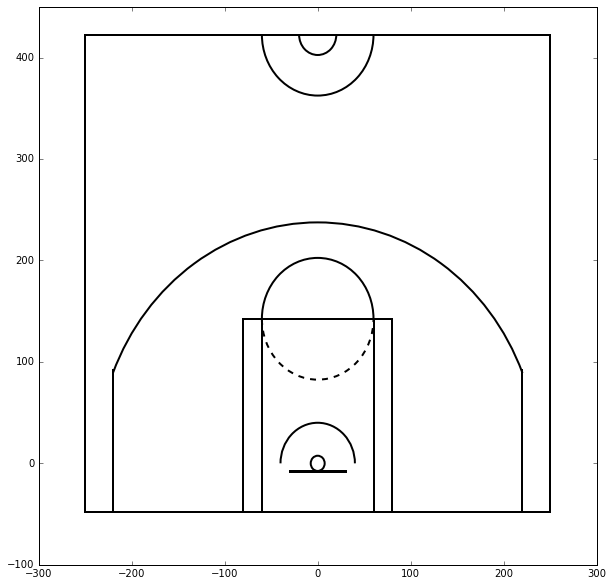

In [9]:
# Call the helper function to draw a court

plt.figure('court')# Begin plotting a figure called court.
draw_court(outer_lines=True)# Call the draw_court function.
plt.xlim(-300,300)# Set the limits of the canvas for the x axis.
plt.ylim(-100,450)# Set the limits of the canvas for the y axis
plt.show()# Display the figure.

While we will look in more detail at plotting in a future lab, we want to give you one more plotting tool, <code>plt.scatter()</code>.

The <code>plt.scatter()</code> allows you to create a scatter plot by passing in a matrix of x and y coordinates. Detailed documentation is here:

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

The code in the following code block is a simple example of this using random data.

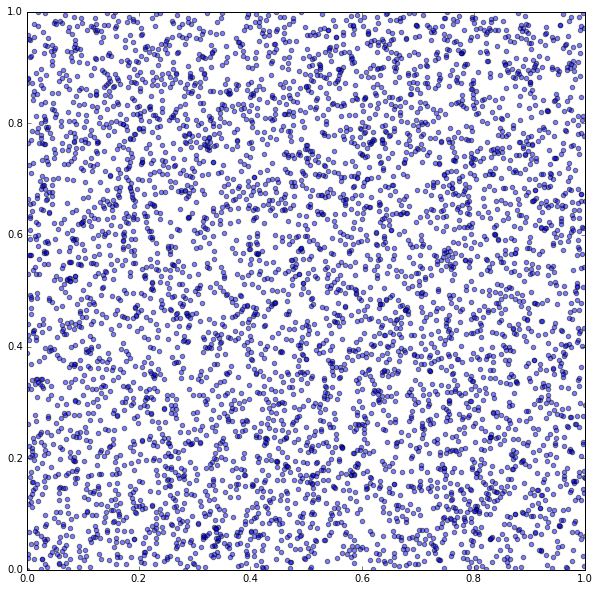

In [10]:
import numpy as np # Import NumPy to generate random numbers.

plt.figure('scatter')# Begin plotting a figure called scatter.
x = np.random.rand(5000)# Generate 5000 random points for the x axis.
y = np.random.rand(5000)# Generate a corresponding 5000 points for the y axis.
plt.xlim(0,1)# Set the limits of the canvas for the x axis.
plt.ylim(0,1)# Set the limits of the canvas for the y axis.
plt.scatter(x,y, alpha=.5)# Plot the points with alpha value to make semi-transparent.
plt.show()# Show the plot in the notebook.

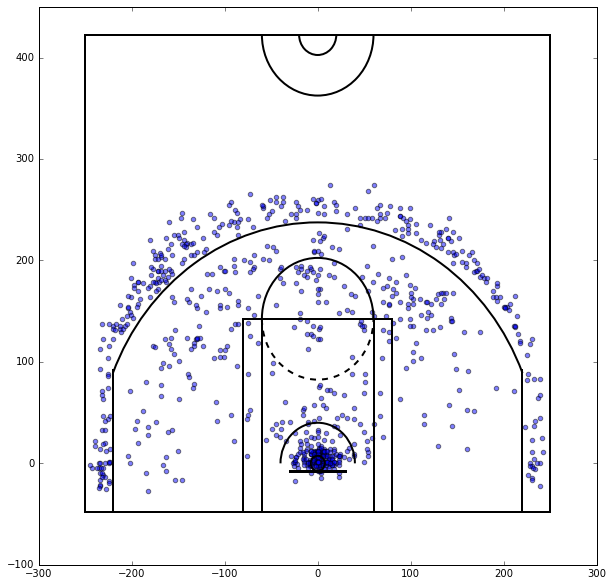

In [11]:
plt.figure('scatter')
x = brandon_shots['LOC_X']# make this just a column of the X shot locations from your datafrane above like dataframe['LOC_X']
y = brandon_shots['LOC_Y']# make this just a column of the Y shot locations from your datafrane above like dataframe['LOC_Y']
plt.xlim(-300,300)
plt.ylim(-100,450)
draw_court(outer_lines=True)
plt.scatter(x,y, alpha=.5)
plt.show()

Finally, if you want to generate dataframes for other players than Brandon, you can lookup player numbers at http://stats.nba.com/. Player numbers appear in the page query parameters as shown below:

<img src="https://raw.githubusercontent.com/azbones/big_data/master/images/brandon.png">

## Written Response 1:
_(Enter Your Response in This Cell)_

Develop and enter a research question in this markdown box that you can explore with the NBA data, dataframe functions, and plotting. Do not use Brandon Knight in this question.

Specically, use scatter plots to plot player shot selection on the pyplot court image. Try to make the research question more interesting by exploring something beyond just shot selection for a single player across the whole season across the whole game.

Our question to answer is...<BLAHBLAHBLAH>
Option 1: 
What is the 3pt. FGs percentage made by the team in the last 2 minutes of the game for the season?
Will need a team/team ID, season dates, and all player stats...
"Makes vs misses"



Total number of 2PT and 3PT field goal shots attempted and made by James Harden:
1470

Location of shots:


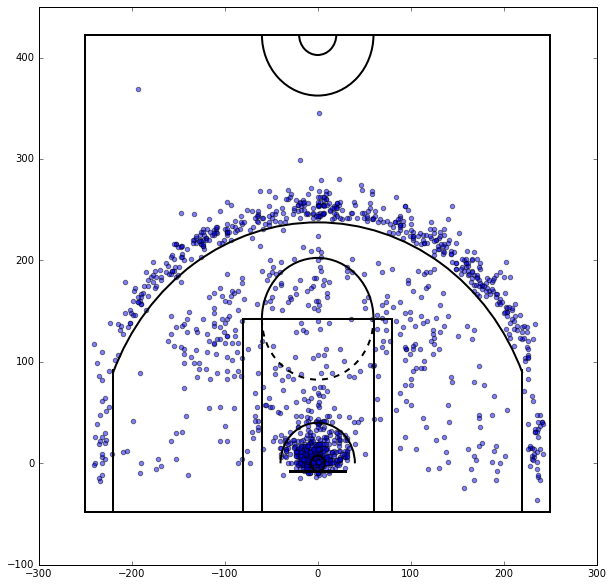

In [16]:
# Write code to present visualizations that inform your research question. 
# Remember, plot the court, plot the shots, and then "show" the figure.

print 'Total number of 2PT and 3PT field goal shots attempted and made by James Harden:'
print james_shots['SHOT_ATTEMPTED_FLAG'].sum()
print
print 'Location of shots:'
plt.figure('scatter')
x = james_shots['LOC_X']# make this just a column of the X shot locations from your datafrane above like dataframe['LOC_X']
y = james_shots['LOC_Y']# make this just a column of the Y shot locations from your datafrane above like dataframe['LOC_Y']
plt.xlim(-300,300)
plt.ylim(-100,450)
draw_court(outer_lines=True)
plt.scatter(x,y, alpha=.5)
plt.show()

In [14]:
# Write the code to build a dataframe like we did for Brandon for a different player with some sort of criteria.
james = 201935

In [29]:
james_shots = get_shot_stats(james)
print james_shots

              GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME  \
0     Shot Chart Detail  0021400003             18     201935  James Harden   
1     Shot Chart Detail  0021400003             39     201935  James Harden   
2     Shot Chart Detail  0021400003             41     201935  James Harden   
3     Shot Chart Detail  0021400003             95     201935  James Harden   
4     Shot Chart Detail  0021400003            120     201935  James Harden   
5     Shot Chart Detail  0021400003            214     201935  James Harden   
6     Shot Chart Detail  0021400003            241     201935  James Harden   
7     Shot Chart Detail  0021400003            252     201935  James Harden   
8     Shot Chart Detail  0021400003            254     201935  James Harden   
9     Shot Chart Detail  0021400003            272     201935  James Harden   
10    Shot Chart Detail  0021400003            279     201935  James Harden   
11    Shot Chart Detail  0021400003            300  

Number of 3PT Field Goals Attempted:
555
Number of 3PT Field Goals Made:
208

Location of attempted 3PT shots:


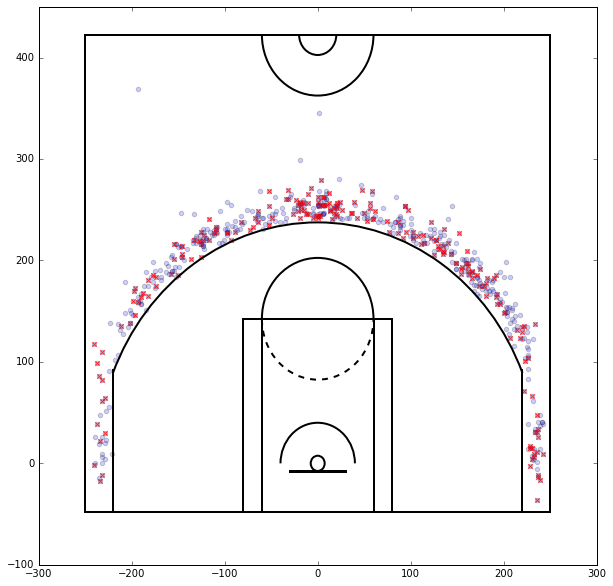

Number of 3PT Field Goals Missed:
0


In [21]:
# Write code to generate some basic statistics (like sum() or average()) to inform your research question.
james_shot_type_attempt = james_shots[(james_shots.SHOT_TYPE == '3PT Field Goal') & (james_shots.SHOT_ATTEMPTED_FLAG == 1)]
x_attempt = james_shot_type_attempt['LOC_X']
x_made = james_shot_type_made['LOC_X']
y_attempt = james_shot_type_attempt['LOC_Y']
y_made = james_shot_type_made['LOC_Y']
print 'Number of 3PT Field Goals Attempted:'
print james_shot_type_attempt['SHOT_ATTEMPTED_FLAG'].sum()
print 'Number of 3PT Field Goals Made:'
print james_shot_type_made['SHOT_MADE_FLAG'].sum()
print
print 'Location of attempted 3PT shots:'
plt.figure('scatter')
xa = x_attempt# make this just a column of the X shot locations from your datafrane above like dataframe['LOC_X']
xm = x_made# make this just a column of the X shot locations from your datafrane above like dataframe['LOC_X']
ya = y_attempt# make this just a column of the Y shot locations from your datafrane above like dataframe['LOC_Y']
ym = y_made# make this just a column of the Y shot locations from your datafrane above like dataframe['LOC_Y']
plt.xlim(-300,300)
plt.ylim(-100,450)
draw_court(outer_lines=True)
plt.scatter(xa,ya, alpha=.2)
plt.scatter(xm,ym, color='red', alpha=.8, marker='x')
plt.show()

james_shot_type_missed = james_shots[(james_shots.SHOT_TYPE == '3PT Field Goal') & (james_shots.SHOT_MADE_FLAG == 0)]
print 'Number of 3PT Field Goals Missed:'
print james_shot_type_missed['SHOT_MADE_FLAG'].sum()



In [71]:
print 'SHOTS MISSED BY TYPE'
james_shot_type_jump_miss = james_shots[(james_shots.ACTION_TYPE == 'Jump Shot') & (james_shots.SHOT_MADE_FLAG == 0)]
jump_miss = james_shot_type_jump_miss['ACTION_TYPE'].count()
print 'Jump:', jump_miss

james_shot_type_lay_miss = james_shots[(james_shots.ACTION_TYPE == 'Layup Shot') & (james_shots.SHOT_MADE_FLAG == 0)]
lay_miss = james_shot_type_lay_miss['ACTION_TYPE'].count()
print 'Layup:', lay_miss

james_shot_type_drive_miss = james_shots[(james_shots.ACTION_TYPE == 'Driving Layup Shot') & (james_shots.SHOT_MADE_FLAG == 0)]
drive_miss = james_shot_type_drive_miss['ACTION_TYPE'].count()
print 'Driving Layup:', drive_miss

james_shot_type_alley_miss = james_shots[(james_shots.ACTION_TYPE == 'Alley Oop Layup shot') & (james_shots.SHOT_MADE_FLAG == 0)]
alley_miss = james_shot_type_alley_miss['ACTION_TYPE'].count()
print 'Alley Oop Layup:', alley_miss

james_shot_type_pull_miss = james_shots[(james_shots.ACTION_TYPE == 'Pullup Jump shot') & (james_shots.SHOT_MADE_FLAG == 0)]
pull_miss = james_shot_type_pull_miss['ACTION_TYPE'].count()
print 'Pullup Jump:', pull_miss

james_shot_type_step_miss = james_shots[(james_shots.ACTION_TYPE == 'Step Back Jump shot') & (james_shots.SHOT_MADE_FLAG == 0)]
step_miss = james_shot_type_step_miss['ACTION_TYPE'].count()
print 'Step Back Jump:', step_miss

james_shot_type_fade_miss = james_shots[(james_shots.ACTION_TYPE == 'Fade away Jump Shot') & (james_shots.SHOT_MADE_FLAG == 0)]
fade_miss = james_shot_type_fade_miss['ACTION_TYPE'].count()
print 'Fade Away Jump:', fade_miss

james_shot_type_run_miss = james_shots[(james_shots.ACTION_TYPE == 'Running Jump Shot') & (james_shots.SHOT_MADE_FLAG == 0)]
run_miss = james_shot_type_run_miss['ACTION_TYPE'].count()
print 'Running Jump:', run_miss

james_shot_type_drivejump_miss = james_shots[(james_shots.ACTION_TYPE == 'Driving Jump shot') & (james_shots.SHOT_MADE_FLAG == 0)]
drivejump_miss = james_shot_type_drivejump_miss['ACTION_TYPE'].count()
print 'Driving Jump:', drivejump_miss

SHOTS MISSED BY TYPE
Jump: 427
Layup: 83
Driving Layup: 98
Alley Oop Layup: 0
Pullup Jump: 35
Step Back Jump: 100
Fade Away Jump: 0
Running Jump: 21
Driving Jump: 6


In [76]:
print 'SHOTS ATTEMPTED BY TYPE'
james_shot_type_jump_attempt = james_shots[(james_shots.ACTION_TYPE == 'Jump Shot') & (james_shots.SHOT_ATTEMPTED_FLAG == 1)]
jump_attempt = james_shot_type_jump_attempt['ACTION_TYPE'].count()
print 'Jump:', jump_attempt

james_shot_type_lay_attempt = james_shots[(james_shots.ACTION_TYPE == 'Layup Shot') & (james_shots.SHOT_ATTEMPTED_FLAG == 1)]
lay_attempt = james_shot_type_lay_attempt['ACTION_TYPE'].count()
print 'Layup:', lay_attempt

james_shot_type_drive_attempt = james_shots[(james_shots.ACTION_TYPE == 'Driving Layup Shot') & (james_shots.SHOT_ATTEMPTED_FLAG == 1)]
drive_attempt = james_shot_type_drive_attempt['ACTION_TYPE'].count()
print 'Driving Layup:', drive_attempt

james_shot_type_alley_attempt = james_shots[(james_shots.ACTION_TYPE == 'Alley Oop Layup shot') & (james_shots.SHOT_ATTEMPTED_FLAG == 1)]
alley_attempt = james_shot_type_alley_attempt['ACTION_TYPE'].count()
print 'Alley Oop Layup:', alley_attempt

james_shot_type_pull_attempt = james_shots[(james_shots.ACTION_TYPE == 'Pullup Jump shot') & (james_shots.SHOT_ATTEMPTED_FLAG == 1)]
pull_attempt = james_shot_type_pull_attempt['ACTION_TYPE'].count()
print 'Pullup Jump:', pull_attempt

james_shot_type_step_attempt = james_shots[(james_shots.ACTION_TYPE == 'Step Back Jump shot') & (james_shots.SHOT_ATTEMPTED_FLAG == 1)]
step_attempt = james_shot_type_step_attempt['ACTION_TYPE'].count()
print 'Step Back Jump:', step_attempt

james_shot_type_fade_attempt = james_shots[(james_shots.ACTION_TYPE == 'Fade away Jump Shot') & (james_shots.SHOT_ATTEMPTED_FLAG == 1)]
fade_attempt = james_shot_type_fade_attempt['ACTION_TYPE'].count()
print 'Fade Away Jump:', fade_attempt

james_shot_type_run_attempt = james_shots[(james_shots.ACTION_TYPE == 'Running Jump Shot') & (james_shots.SHOT_ATTEMPTED_FLAG == 1)]
run_attempt = james_shot_type_run_attempt['ACTION_TYPE'].count()
print 'Running Jump:', run_attempt

james_shot_type_drivejump_attempt = james_shots[(james_shots.ACTION_TYPE == 'Driving Jump shot') & (james_shots.SHOT_ATTEMPTED_FLAG == 1)]
drivejump_attempt = james_shot_type_drivejump_attempt['ACTION_TYPE'].count()
print 'Driving Jump:', drivejump_attempt

SHOTS ATTEMPTED BY TYPE
Jump: 605
Layup: 127
Driving Layup: 293
Alley Oop Layup: 4
Pullup Jump: 66
Step Back Jump: 191
Fade Away Jump: 0
Running Jump: 31
Driving Jump: 10


In [70]:
print 'SHOTS MADE BY TYPE'
james_shot_type_jump_made = james_shots[(james_shots.ACTION_TYPE == 'Jump Shot') & (james_shots.SHOT_MADE_FLAG == 1)]
jump_made = james_shot_type_jump_made['ACTION_TYPE'].count()
print 'Jump:', jump_made

james_shot_type_lay_made = james_shots[(james_shots.ACTION_TYPE == 'Layup Shot') & (james_shots.SHOT_MADE_FLAG == 1)]
lay_made = james_shot_type_lay_made['ACTION_TYPE'].count()
print 'Layup:', lay_made

james_shot_type_drive_made = james_shots[(james_shots.ACTION_TYPE == 'Driving Layup Shot') & (james_shots.SHOT_MADE_FLAG == 1)]
drive_made = james_shot_type_drive_made['ACTION_TYPE'].count()
print 'Driving Layup:', drive_made

james_shot_type_alley_made = james_shots[(james_shots.ACTION_TYPE == 'Alley Oop Layup shot') & (james_shots.SHOT_MADE_FLAG == 1)]
alley_made = james_shot_type_alley_made['ACTION_TYPE'].count()
print 'Alley Oop Layup:', alley_made

james_shot_type_pull_made = james_shots[(james_shots.ACTION_TYPE == 'Pullup Jump shot') & (james_shots.SHOT_MADE_FLAG == 1)]
pull_made = james_shot_type_pull_made['ACTION_TYPE'].count()
print 'Pullup Jump:', pull_made

james_shot_type_step_made = james_shots[(james_shots.ACTION_TYPE == 'Step Back Jump shot') & (james_shots.SHOT_MADE_FLAG == 1)]
step_made = james_shot_type_step_made['ACTION_TYPE'].count()
print 'Step Back Jump:', step_made

james_shot_type_fade_made = james_shots[(james_shots.ACTION_TYPE == 'Fade away Jump Shot') & (james_shots.SHOT_MADE_FLAG == 1)]
fade_made = james_shot_type_fade_made['ACTION_TYPE'].count()
print 'Fade Away Jump:', fade_made

james_shot_type_run_made = james_shots[(james_shots.ACTION_TYPE == 'Running Jump Shot') & (james_shots.SHOT_MADE_FLAG == 1)]
run_made = james_shot_type_run_made['ACTION_TYPE'].count()
print 'Running Jump:', run_made

james_shot_type_drivejump_made = james_shots[(james_shots.ACTION_TYPE == 'Driving Jump shot') & (james_shots.SHOT_MADE_FLAG == 1)]
drivejump_made = james_shot_type_drivejump_made['ACTION_TYPE'].count()
print 'Driving Jump:', drivejump_made

SHOTS MADE BY TYPE
Jump: 178
Layup: 44
Driving Layup: 195
Alley Oop Layup: 4
Pullup Jump: 31
Step Back Jump: 91
Fade Away Jump: 0
Running Jump: 10
Driving Jump: 4


In [75]:
print 'PERCENTAGE OF MISSED SHOTS BY TYPE'
print
jump_miss_percent = (1.0 * jump_miss / jump_attempt) * 100
lay_miss_percent = (1.0 * lay_miss / lay_attempt) * 100
drive_miss_percent = (1.0 * drive_miss / drive_attempt) * 100
alley_miss_percent = (1.0 * alley_miss / alley_attempt) * 100
pull_miss_percent = (1.0 * pull_miss / pull_attempt) * 100
step_miss_percent = (1.0 * step_miss / step_attempt) * 100
#fade_miss_percent = (1.0 * fade_miss / fade_attempt) * 100
run_miss_percent = (1.0 * run_miss / run_attempt) * 100
drivejump_miss_percent = (1.0 * drivejump_miss / drivejump_attempt) * 100
print 'Jump:', jump_miss_percent
print 'Layup:', lay_miss_percent
print 'Driving Layup:', drive_miss_percent
print 'Alley Oop Layup:', alley_miss_percent
print 'Pullup Jump:', pull_miss_percent
print 'Step Back Jump:', step_miss_percent
print 'Fade Away Jump: N/A'
print 'Running Jump:', run_miss_percent
print 'Driving Jump:', drivejump_miss_percent

 PERCENTAGE OF MISSED SHOTS BY TYPE

Jump: 70.5785123967
Layup: 65.3543307087
Driving Layup: 33.4470989761
Alley Oop Layup: 0.0
Pullup Jump: 53.0303030303
Step Back Jump: 52.3560209424
Fade Away Jump: N/A
Running Jump: 67.7419354839
Driving Jump: 60.0


Location of Jump Shots Attempted: (in blue)
Location of Jump Shots Missed: (in red)


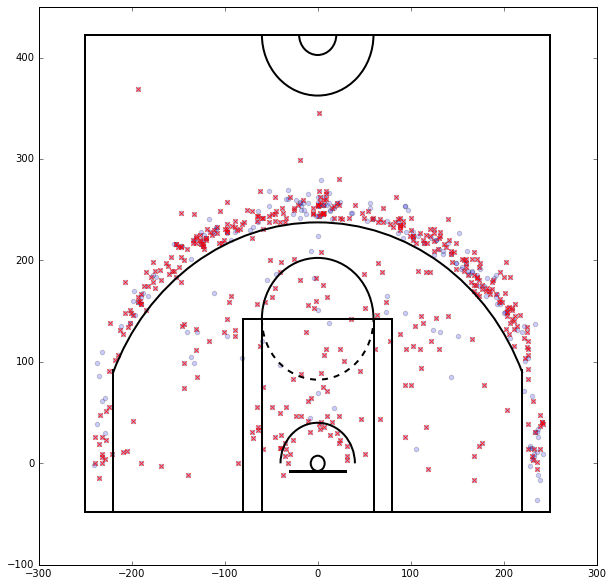

In [82]:
# Write code to generate some basic statistics (like sum() or average()) to inform your research question.
james_shot_type_attempt = james_shots[(james_shots.ACTION_TYPE == 'Jump Shot') & (james_shots.SHOT_ATTEMPTED_FLAG == 1)]
james_shot_type_miss = james_shots[(james_shots.ACTION_TYPE == 'Jump Shot') & (james_shots.SHOT_MADE_FLAG == 0)]
x_attempt = james_shot_type_attempt['LOC_X']
x_miss = james_shot_type_miss['LOC_X']
y_attempt = james_shot_type_attempt['LOC_Y']
y_miss = james_shot_type_miss['LOC_Y']
print 'Location of Jump Shots Attempted: (in blue)'
print 'Location of Jump Shots Missed: (in red)'
plt.figure('scatter')
xa = x_attempt# make this just a column of the X shot locations from your datafrane above like dataframe['LOC_X']
xm = x_miss# make this just a column of the X shot locations from your datafrane above like dataframe['LOC_X']
ya = y_attempt# make this just a column of the Y shot locations from your datafrane above like dataframe['LOC_Y']
ym = y_miss# make this just a column of the Y shot locations from your datafrane above like dataframe['LOC_Y']
plt.xlim(-300,300)
plt.ylim(-100,450)
draw_court(outer_lines=True)
plt.scatter(xa,ya, alpha=.2)
plt.scatter(xm,ym, color='red', alpha=.8, marker='x')
plt.show()



## Written Response 2:
_(Enter Your Response in This Cell)_

Provide a short write up of what your analysis revealed. 

## Written Response 3:
_(Enter Your Response in This Cell)_

* How might data available from public websites be part of a "big data" strategy?
* What might some of the challenges of this approach be?


